## LDA (Latent Dirichlet Allocation)

LDA is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word’s presence is attributable to one of the document’s topics.

To connect this back to bag-of-words (term frequency), the former approach can be thought of as a simplistic probabilistic model of documents as distributions over words. The bag-of-words vector then represents the best approximation we have for the unnormalized distribution-of-words in each document; but document here is the basic probabilistic unit, each a single sample of its unique distribution.


The crux of the matter, then, is to move from this simple probabilistic model of documents as distributions over words to a more complex one by adding a latent (hidden) intermediate layer of K topics.

- From CSCD25, by Ashton Anderson ![image](../images/lda_cscd25.png)

We are explaining documents (companies in our case) by their distribution across topics, which themselves are explained by a distribution of words.

![image.png](../images/lda.jpeg)

## Lets get to the code!

First we need to load in the functions and data:

In [9]:
import os
import json
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

df = pd.read_csv("../data/preprocessed.csv")

The LDA decomposition is based off of a tf-idf matrix, which we calculated earlier. As you can see, its quite simple to create a data pipeline that passes our data through the models we want to fit.

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('count', CountVectorizer(
                                           ngram_range = (2,4),
                                           stop_words = 'english', max_features = 600)),
                 ('tfidf', TfidfTransformer()),
                 ('lda', LatentDirichletAllocation(n_components = 8))]).fit(df["coDescription_stopwords"])

Below we have the matrix of our 8 (arbitrarily) chosen topics and their vectors as they lie in our 600 term vector space:

In [6]:
pd.DataFrame(pipe["lda"].components_)

0         1         2         3         4         5         6    \
0  0.162620  0.125206  0.125000  0.362543  0.508137  0.321409  2.726274   
1  0.125005  0.125001  0.125000  0.125001  0.125023  0.125002  0.125001   
2  0.125006  0.125001  0.125000  0.125001  0.125001  0.125002  0.125001   
3  0.198723  1.377569  0.125011  0.465285  2.889606  0.415501  2.110468   
4  0.125004  0.125001  0.125000  0.125001  0.125001  0.125001  0.125001   
5  0.125006  0.125001  0.125000  0.125001  0.125001  0.125002  0.125001   
6  2.606604  1.036823  5.457219  0.627468  2.484976  2.370524  2.927159   
7  0.871365  0.632864  0.125000  2.226942  1.896064  1.041080  0.811805   

        7         8         9    ...       590       591       592       593  \
0  0.125000  2.171440  0.465899  ...  0.125240  0.125000  0.125200  0.164702   
1  0.125000  0.125001  0.125001  ...  0.125001  0.125000  0.125001  0.125005   
2  0.125000  0.125001  0.125001  ...  0.125001  0.125000  0.125001  0.125005   
3  0.125124  2.325255  1.485050  ...  9.087201  0.125004  1.754284  0.126862   
4  0.125000  0.125000  0.125001  ...  0.125000  0.125000  0.125000  0.125004   
5  0.125000  0.125001  0.125001  ...  0.125001  0.125000  0.125001  0.125005   
6  0.125057  6.358762  3.067667  ...  2.249017  0.125002  1.901591  4.669010   
7  3.149334  0.857222  0.322980  ...  1.742340  3.161430  1.035317  0.878214   

        594       595       596        597        598       599  
0  0.920622  0.760421  1.566885   0.177297   0.171298  0.655121  
1  0.125006  0.125008  0.125022   0.125002   0.125002  0.125052  
2  0.125001  0.125001  0.125001   0.125001   0.125001  0.125001  
3  2.027997  1.841323  3.553886   7.232619   5.643142  2.047808  
4  0.125001  0.125001  0.125001   0.125001   0.125001  0.125001  
5  0.125001  0.125001  0.125001   0.125001   0.125001  0.125001  
6  2.578124  1.901636  0.495965  12.506363  12.362395  0.974930  
7  0.918354  0.774496  1.169133   1.080226   1.144097  1.004969  

[8 rows x 600 columns]

Below we have the top 5 terms for each topic that we've created from our corpus:

In [5]:
lda_weights = pd.DataFrame(pipe["lda"].components_, columns = pipe["count"].get_feature_names_out())

lda_weights = lda_weights.melt(ignore_index = False).reset_index()

lda_weights.groupby('index').apply(lambda x:x.sort_values('value', ascending=False).iloc[0:5])

index                    variable      value
index                                                   
0     4680      0              vice president  10.683467
      1592      0              executive vice   5.350311
      1600      0    executive vice president   5.286948
      3464      0             president chief   4.998929
      672       0             chief executive   3.033900
1     3697      1                 real estate  58.997070
      873       1                common stock  22.532922
      3201      1       operating partnership  20.980259
      4313      1                 square feet  16.184554
      2353      1                  income tax  14.449930
2     778       2             clinical trials  40.013413
      770       2              clinical trial  38.271190
      3506      2          product candidates  31.043590
      3370      2              phase clinical  27.121349
      4650      2               united states  24.012366
3     2459      3       intellectual property  14.092725
      787       3                 cloud based  13.679426
      3747      3                   real time  11.404174
      3531      3       professional services  10.189612
      4651      3               united states  10.117390
4     2964      4                 natural gas  33.051621
      3124      4                     oil gas  20.379457
      3132      4                 oil natural  20.316693
      3140      4             oil natural gas  20.113739
      2308      4        hydraulic fracturing   8.245336
5     349       5                bank holding  31.326727
      2285      5             holding company  28.548865
      1789      5             federal reserve  24.062082
      365       5        bank holding company  20.044553
      1349      5                  dodd frank  16.676188
6     3038      6                   net sales   0.125008
      3334      6                 patriot act   0.125007
      2846      6               member states   0.125007
      2574      6              joint ventures   0.125006
      4230      6      series preferred stock   0.125006
7     4207      7                self storage   5.257961
      1655      7                  fair value   5.100199
      2479      7            internal control   4.760086
      1047      7           control financial   4.202188
      2487      7  internal control financial   4.186427

Here we transform company reports using the data pipeline we built earlier which gives us a probability of belonging to each of the 8 topics:

In [13]:
lda_df = pd.DataFrame(pipe.transform(df['coDescription']))
lda_df

0         1         2         3         4         5         6  \
0    0.021926  0.021918  0.021918  0.846046  0.021969  0.021918  0.022377   
1    0.025434  0.025401  0.025401  0.821894  0.025448  0.025401  0.025569   
2    0.020530  0.020523  0.020523  0.856256  0.020575  0.020523  0.020543   
3    0.022692  0.022679  0.022679  0.841131  0.022753  0.022679  0.022701   
4    0.024693  0.019877  0.019877  0.093398  0.019885  0.019877  0.782507   
..        ...       ...       ...       ...       ...       ...       ...   
670  0.025358  0.025356  0.025356  0.025378  0.025357  0.025356  0.822465   
671  0.823336  0.019261  0.019261  0.060998  0.019261  0.019261  0.019345   
672  0.022341  0.017571  0.017571  0.042552  0.017572  0.017571  0.847237   
673  0.019958  0.019954  0.019954  0.019983  0.019994  0.019954  0.860231   
674  0.051686  0.051683  0.051683  0.596594  0.051683  0.051683  0.093280   

            7  
0    0.021928  
1    0.025451  
2    0.020529  
3    0.022687  
4    0.019886  
..        ...  
670  0.025374  
671  0.019276  
672  0.017585  
673  0.019973  
674  0.051708  

[675 rows x 8 columns]

## Plotting the results

Here are the results of running our data through LDA.

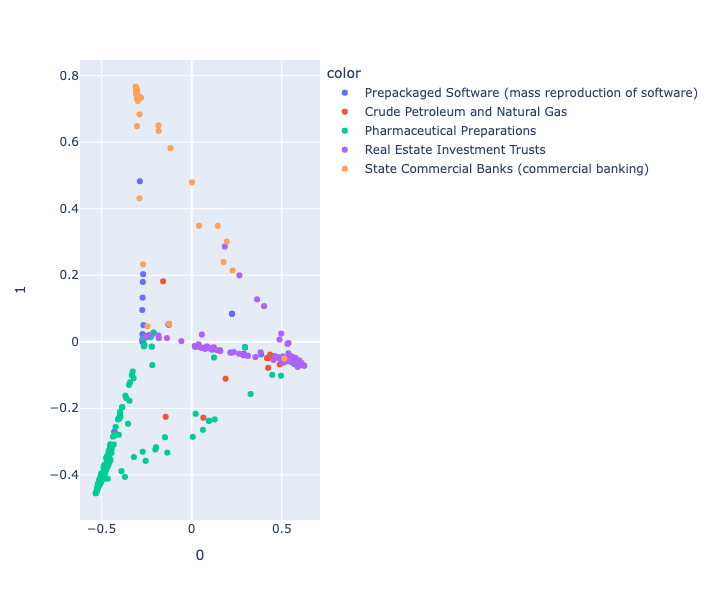

In [11]:
plot = std_func.pca_visualize_2d(lda_df, df.loc[:,["name","SIC_desc"]])

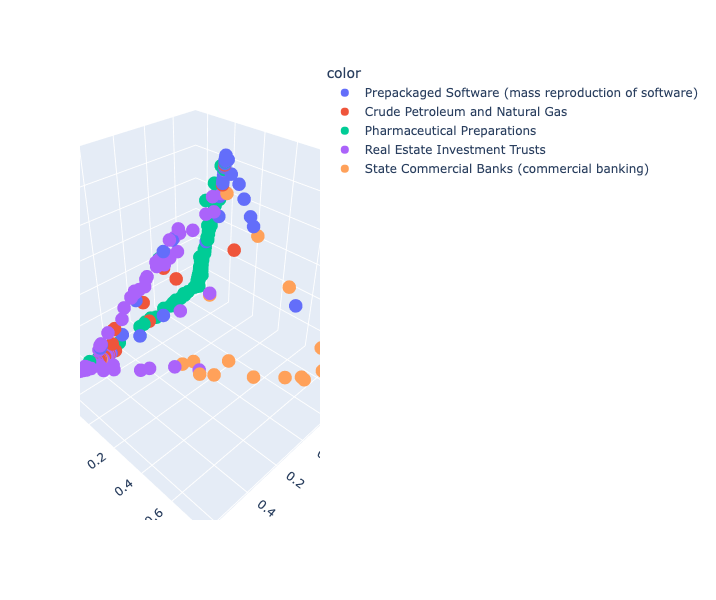

In [12]:
std_func.pca_visualize_3d(plot)

You may have noticed that these plots look very... _triangular_. What these plots visualize are the 8 probability dimensions calculated using LDA and projected to this lower dimensional space. 

These embeddings are not exactly helpful in clustering documents together, but they can give us a great view into the latent topics that exist within our corpus.

If we examine the explained variance ratio, we see that the top three dimensions don't actually explain that much of the variation that exists within our data/companies. This is as expected.

In [9]:
plot[0].explained_variance_ratio_

array([0.39295358, 0.2969741 , 0.17975653, 0.09168491])